In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import cv2
import os

In [129]:
classifier_classes = {'no_tumor': 0, 'pituitary_tumor': 1, 'meningioma_tumor': 1}

In [130]:
X = []
Y = []

for cls_class in classifier_classes:
    path = 'data/Training/' + cls_class
    for file in os.listdir(path):
        img = cv2.imread(path + '/' + file, 0)
        img = cv2.resize(img, (200, 200))
        X.append(img)
        Y.append(classifier_classes[cls_class])

In [131]:
X = np.array(X)
Y = np.array(Y)
X.shape

(2044, 200, 200)

In [132]:
# Sklearn accepts only bidiomensional data, so we have to convert it

X_reshape = X.reshape(len(X), -1)
X_reshape.shape

(2044, 40000)

In [133]:
xTrain, xTest, yTrain, yTest = train_test_split(X_reshape, Y, random_state=10, test_size=.2)

In [134]:
xTrain.shape, xTest.shape

((1635, 40000), (409, 40000))

In [135]:
# Scalling data

xTrain = xTrain / 255
xTest = xTest / 255

In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [137]:
classifier = LogisticRegression(C=0.1)
classifier.fit(xTrain, yTrain)

LogisticRegression(C=0.1)

In [138]:
classifier.score(xTest, yTest)

0.8875305623471883

In [139]:
dec = {0: 'No Tumor', 1: 'Positive Tumor'}

In [140]:
def test_based_on_images(fileTestingClass):
    plt.figure(figsize=(12,8))
    p = os.listdir('Data/Testing/')
    
    c=1
    for i in os.listdir('Data/Testing/' + fileTestingClass)[:9]:
        plt.subplot(3,3,c)

        img = cv2.imread('Data/Testing/' + fileTestingClass + i, 0)
        img1 = cv2.resize(img, (200,200))
        img1 = img1.reshape(1,-1)/255
        p = classifier.predict(img1)
        plt.title(dec[p[0]])
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        c+=1

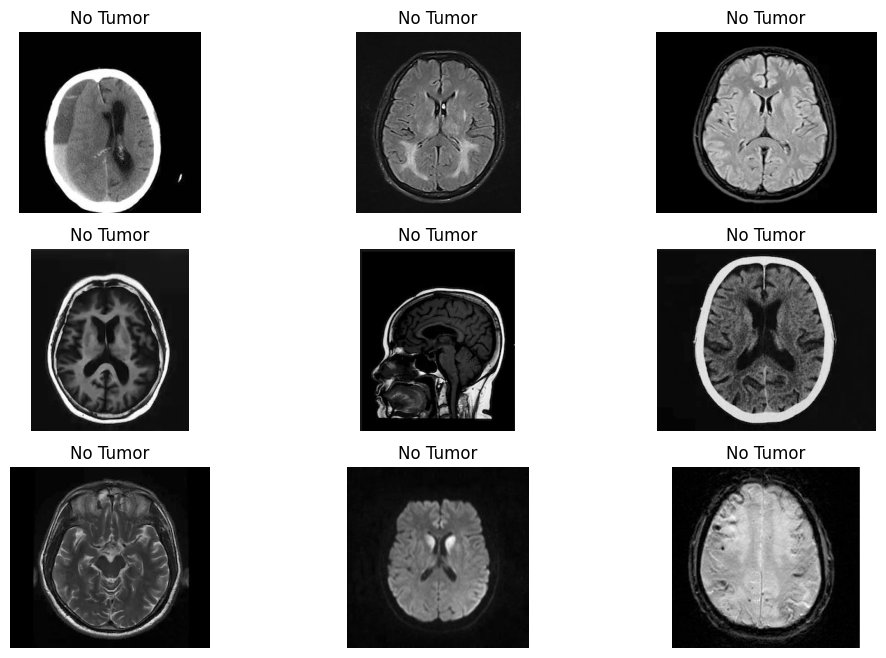

In [141]:
test_based_on_images('no_tumor/')

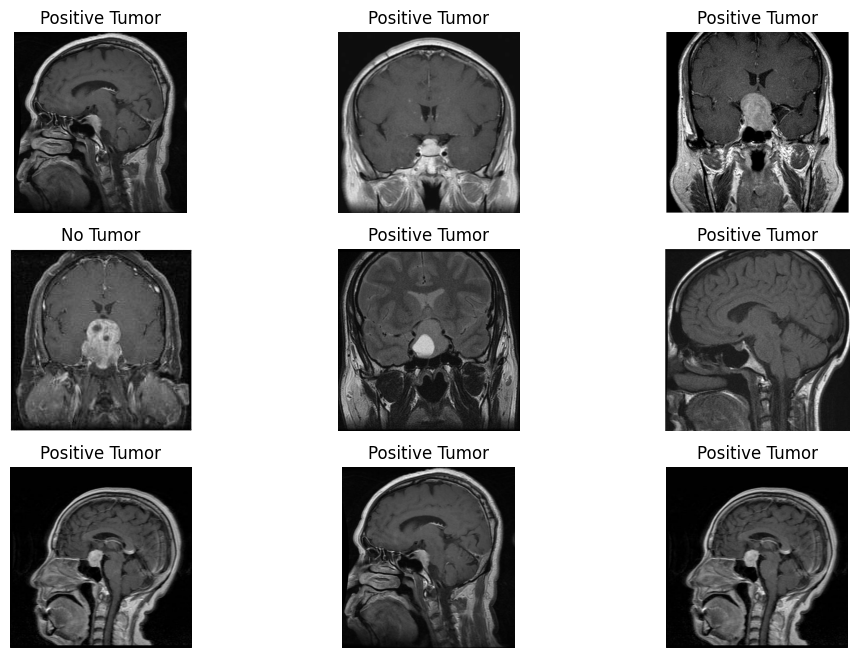

In [142]:
test_based_on_images('pituitary_tumor/')

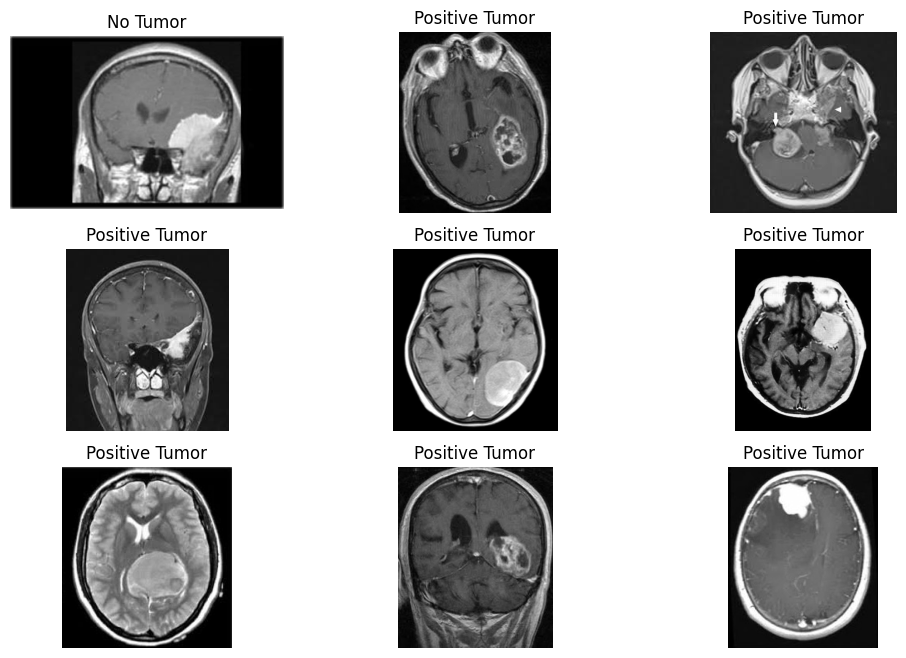

In [143]:
test_based_on_images('meningioma_tumor/')